# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [1]:
import numpy as np
import pandas as pd
import scipy
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataEval = pd.read_csv ("./data/asteroidEval.csv")
dataTrain_bruto = pd.read_csv ("./data/asteroidTrain.csv")

# El archivo tiene 100.000 filas, de las cuales solo usaremos 10.000 para el entrenamiento. --------------- falta revisar este valor
dataTrain = dataTrain_bruto.sample(10000, random_state=2)

# Primero, se eliminaron las variables que estaban vacias.
del(dataTrain['G'])
del(dataTrain['extent'])
del(dataTrain['rot_per'])
del(dataTrain['GM'])
del(dataTrain['BV'])
del(dataTrain['UB'])
del(dataTrain['IR'])
del(dataTrain['spec_B'])
del(dataTrain['spec_T'])
del(dataTrain['neo'])
del(dataTrain['pha'])

# Luego eliminamos:
del(dataTrain['condition_code']) # no es necesario saber qué tan bien se conoce la órbita de un objeto.
del(dataTrain['n_obs_used']) # no es necesario saber que tantas observaciones se usaron.
del(dataTrain['full_name']) # no es necesario saber el nombre

#print(dataTrain.to_string())
dataTrain['diameter'] = dataTrain['diameter'].str.replace('.','').astype(np.float64)
# dataTrain.dtypes

dataTrain = dataTrain.dropna()

C:\Users\satel\AppData\Local\Temp/ipykernel_23288/1522818531.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\satel\AppData\Local\Temp/ipykernel_23288/1522818531.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\satel\AppData\Local\Temp/ipykernel_23288/1522818531.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


<AxesSubplot:>

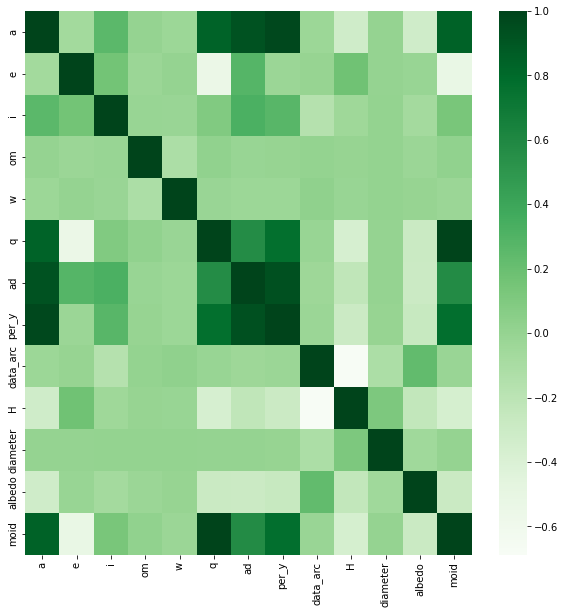

In [3]:
plt.figure(figsize=(10,10))
correlation = dataTrain.corr()
sns.heatmap(correlation,cmap='Greens')

In [4]:
# def train(X, y, hidden_layer_size, learning_rate, epochs):
#     # normalizamos los datos
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X) # no hay que pasar el nombre
#     y = scaler.fit_transform(y)

#     # creamos la red neuronal
#     mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_size,
#                        activation='relu',
#                        solver='adam',
#                        learning_rate_init=learning_rate,
#                        max_iter=epochs,
#                        verbose=True)
#     mlp.fit(X, y)
#     return mlp

# X = dataTrain.dropna()
# y = X['diameter'].astype(float)
# mlp = train(X, y, hidden_layer_size=(100,), learning_rate=0.001, epochs=100)

In [5]:
x = dataTrain.drop("diameter", axis=1)

y = dataTrain["diameter"]
print(x)
print("-"*30)
print(y)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=42)

              a         e          i          om           w         q  \
50680  2.233296  0.214207   4.849435  120.898455  173.050813  1.754908   
49224  3.068338  0.134944   9.440404  227.247710  122.701700  2.654284   
65153  3.104391  0.091432   2.147292  335.481142   23.773316  2.820551   
52340  2.675033  0.167338  12.631265   14.423147  277.183146  2.227400   
35645  3.034970  0.090936  11.044894   52.801940  342.061933  2.758981   
...         ...       ...        ...         ...         ...       ...   
47454  3.017408  0.198534   9.109797   73.259909  349.580059  2.418351   
63771  2.843273  0.205950   5.603790   43.410717  320.082612  2.257700   
60896  2.565484  0.164608  12.770733  220.713756   78.305757  2.143184   
33540  3.046203  0.087950  13.409948  176.411959   55.666452  2.778288   
44359  3.110539  0.119489  28.674259  122.187493  203.444198  2.738864   

             ad     per_y  data_arc     H  albedo      moid  
50680  2.711685  3.337549    9412.0  16.5   0.125

In [11]:
scaler = StandardScaler().fit(xTrain, yTrain)

xRTrain = scaler.transform(xTrain)

mlpmodel = MLPRegressor().fit(xRTrain, yTrain)

predict = mlpmodel.predict(xTest)

print(r2_score(yTest, predict))

error = mean_squared_error(yTest, predict)
print(np.sqrt(error))

params = {"alpha": [0.001, 0.01, 0.1, 0.2],
          "hidden_layer_sizes": [(20, 20), (10, 10), (100, 200, 150), (300, 200, 250)],
          "activation": ["relu", "logistic"]}

#cv = GridSearchCV(mlpmodel, params, cv=10, n_jobs=-1).fit(xRTrain, yTrain)
#print(cv.best_params_)

mlptuned = MLPRegressor(activation="relu", alpha=0.1, hidden_layer_sizes=(20, 20)).fit(xRTrain, yTrain)
predicttuned = mlptuned.predict(xTest)

R2CV = cross_val_score(mlptuned, xTest, yTest, cv=10, scoring="r2").mean()
print(f"R2CV: {R2CV}")


c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but MLPRegressor was fitted without feature names


-0.1607666814031785
1.331688515798017e+16


c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_netw

R2CV: -0.17185935906523211


c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [7]:
R2CV

-0.17185935918901657